In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

# Directory paths (adjust to your setup)
lr_dir = '/content/drive/MyDrive/cv_dataset/low_res'
hr_dir = '/content/drive/MyDrive/cv_dataset/high_res'

# Function to find image files (case insensitive)
def find_images(directory):
    valid_extensions = ['.jpg', '.jpeg', '.png']
    image_files = []
    for file_name in os.listdir(directory):
        if any(file_name.lower().endswith(ext) for ext in valid_extensions):
            image_files.append(file_name)
    return image_files

# Get low-res and high-res images
low_res_images = find_images(low_res_dir)
high_res_images = find_images(high_res_dir)

# Output the number of images found
print(f"Low-res images found: {len(low_res_images)}")
print(f"High-res images found: {len(high_res_images)}")

# Optionally display the names of the images found
print(f"Low-res images: {low_res_images[:5]}...")  # Display first 5 files
print(f"High-res images: {high_res_images[:5]}...")


Low-res images found: 444
High-res images found: 5074
Low-res images: ['ISS001-701-137_3.JPG', 'ISS001-701-102_3.JPG', 'ISS001-701-170_3.JPG', 'ISS001-701-108_3.JPG', 'ISS001-701-174_3.JPG']...
High-res images: ['ISS014-E-15055.JPG', 'ISS015-E-12423.JPG', 'ISS014-E-7416.JPG', 'ISS015-E-7366.JPG', 'ISS014-E-7217.JPG']...


In [ ]:
import glob
import os
from PIL import Image
from torch.utils.data import Dataset

class SRDataset(Dataset):
    def __init__(self, lr_dir, hr_dir, transform=None):
        # Correct the path and include variations in case (e.g., .JPG or .jpg)
        self.lr_images = sorted(glob.glob(os.path.join(lr_dir, "*.[jJ][pP][gG]")))  # Match JPG and jpg
        self.hr_images = sorted(glob.glob(os.path.join(hr_dir, "*.[jJ][pP][gG]")))  # Match JPG and jpg
        self.transform = transform

        # Print number of files found
        print(f"Found {len(self.lr_images)} low-res images and {len(self.hr_images)} high-res images.")

    def __len__(self):
        return len(self.lr_images)

    def __getitem__(self, idx):
        # Read the images
        lr_img = Image.open(self.lr_images[idx])
        hr_img = Image.open(self.hr_images[idx])

        # Apply transformations (if any)
        if self.transform:
            lr_img = self.transform(lr_img)
            hr_img = self.transform(hr_img)

        return lr_img, hr_img


In [ ]:
import os

lr_dir = '/content/drive/MyDrive/cv_dataset/low_res'
hr_dir = '/content/drive/MyDrive/cv_dataset/high_res'

# Debugging the dataset
print(f"Low-res images: {len(os.listdir(lr_dir))}")
print(f"High-res images: {len(os.listdir(hr_dir))}")


Low-res images: 444
High-res images: 5074


In [ ]:
import os

lr_dir = '/content/drive/MyDrive/cv_dataset/low_res'
hr_dir = '/content/drive/MyDrive/cv_dataset/high_res'

# List files with extensions
print("Low-res files:", os.listdir(lr_dir)[:10])  # Check a sample
print("High-res files:", os.listdir(hr_dir)[:10])



Low-res files: ['ISS001-701-137_3.JPG', 'ISS001-701-102_3.JPG', 'ISS001-701-170_3.JPG', 'ISS001-701-108_3.JPG', 'ISS001-701-174_3.JPG', 'ISS001-701-114_3.JPG', 'ISS001-701-112_3.JPG', 'ISS001-701-163_3.JPG', 'ISS001-701-136_3.JPG', 'ISS001-701-162_3.JPG']
High-res files: ['ISS014-E-15055.JPG', 'ISS015-E-12423.JPG', 'ISS014-E-7416.JPG', 'ISS015-E-7366.JPG', 'ISS014-E-7217.JPG', 'ISS014-E-6571.JPG', 'ISS014-E-5367.JPG', 'ISS014-E-6929.JPG', 'ISS013-E-70629.JPG', 'ISS015-E-6299.JPG']


In [ ]:
import glob

lr_images = glob.glob(os.path.join(lr_dir, "*.*"))  # Match all files
hr_images = glob.glob(os.path.join(hr_dir, "*.*"))

print(f"Low-res images found: {len(lr_images)}")
print(f"High-res images found: {len(hr_images)}")


Low-res images found: 444
High-res images found: 5074


In [ ]:
lr_images = glob.glob(os.path.join(lr_dir, "**", "*.*"), recursive=True)
hr_images = glob.glob(os.path.join(hr_dir, "**", "*.*"), recursive=True)

print(f"Low-res images found recursively: {len(lr_images)}")
print(f"High-res images found recursively: {len(hr_images)}")


Low-res images found recursively: 444
High-res images found recursively: 5074


In [ ]:
dataset = SRDataset(lr_dir, hr_dir)
print(f"Dataset size after initialization: {len(dataset)}")

# Check a sample
if len(dataset) > 0:
    lr_img, hr_img = dataset[0]
    print("Sample LR image size:", lr_img.size)
    print("Sample HR image size:", hr_img.size)
else:
    print("Dataset still empty.")


Found 444 low-res images and 5074 high-res images.
Dataset size after initialization: 444
Sample LR image size: (703, 700)
Sample HR image size: (1050, 700)


In [ ]:
import os

# Debug paths
for path in os.listdir(lr_dir):
    print(path)  # Look for irregularities like spaces or special characters


ISS001-701-137_3.JPG
ISS001-701-102_3.JPG
ISS001-701-170_3.JPG
ISS001-701-108_3.JPG
ISS001-701-174_3.JPG
ISS001-701-114_3.JPG
ISS001-701-112_3.JPG
ISS001-701-163_3.JPG
ISS001-701-136_3.JPG
ISS001-701-162_3.JPG
ISS001-701-101_3.JPG
ISS001-701-105_3.JPG
ISS001-701-107_3.JPG
ISS001-701-164_3.JPG
ISS001-701-171_3.JPG
ISS001-701-101.JPG
ISS001-701-104_3.JPG
ISS001-701-119_3.JPG
ISS001-701-120_3.JPG
ISS001-701-113_3.JPG
ISS001-702-76A_3.JPG
ISS001-702-BL_3.JPG
ISS001-702-71P_3.JPG
ISS001-702-109.JPG
ISS001-702-BB_3.JPG
ISS001-702-AV_3.JPG
ISS001-702-AW_3.JPG
ISS001-701-266D_3.JPG
ISS001-702-AN_3.JPG
ISS001-702-19_3.JPG
ISS001-702-S_3.JPG
ISS001-701-86_3.JPG
ISS001-701-87_3.JPG
ISS001-701-193_3.JPG
ISS001-701-371.JPG
ISS001-702-161_3.JPG
ISS001-701-2_3.JPG
ISS001-702-240_3.JPG
ISS001-701-213.JPG
ISS001-701-236AE_3.JPG
ISS001-702-6.JPG
ISS001-701-236U_3.JPG
ISS001-701-298.JPG
ISS001-702-BU_3.JPG
ISS001-701-236E_3.JPG
ISS001-702-171_3.JPG
ISS001-702-52_3.JPG
ISS001-701-90_3.JPG
ISS001-702-AE_3.

In [ ]:
import glob

class SRDataset(Dataset):
    def __init__(self, lr_dir, hr_dir, transform=None):
        self.lr_images = sorted(glob.glob(os.path.join(lr_dir, "*.[jJ][pP][gG]")))  # Case-insensitive match
        self.hr_images = sorted(glob.glob(os.path.join(hr_dir, "*.[jJ][pP][gG]")))
        self.transform = transform

    def __len__(self):
        return len(self.lr_images)

    def __getitem__(self, idx):
        lr_img = Image.open(self.lr_images[idx]).convert("RGB")
        hr_img = Image.open(self.hr_images[idx]).convert("RGB")
        if self.transform:
            lr_img = self.transform(lr_img)
            hr_img = self.transform(hr_img)
        return lr_img, hr_img


In [ ]:
dataset = SRDataset('/path/to/low_res', '/path/to/high_res')
print(f"Dataset size after fix: {len(dataset)}")


Dataset size after fix: 0


In [ ]:
def __getitem__(self, idx):
    try:
        lr_img = Image.open(self.lr_images[idx]).convert("RGB")
        hr_img = Image.open(self.hr_images[idx]).convert("RGB")
        if self.transform:
            lr_img = self.transform(lr_img)
            hr_img = self.transform(hr_img)
        return lr_img, hr_img
    except Exception as e:
        print(f"Error loading image {self.lr_images[idx]} or {self.hr_images[idx]}: {e}")
        return None, None


In [ ]:
if len(dataset) > 0:
    lr_img, hr_img = dataset[0]
    print(f"Low-res image size: {lr_img.size}")
    print(f"High-res image size: {hr_img.size}")
else:
    print("Dataset still empty.")


Dataset still empty.


In [ ]:
# Debugging glob directly without class
lr_images = sorted(glob.glob(os.path.join(lr_dir, "**", "*.[jJ][pP][gG]"), recursive=True))
hr_images = sorted(glob.glob(os.path.join(hr_dir, "**", "*.[jJ][pP][gG]"), recursive=True))

print(f"Low-res images found: {len(lr_images)}")
print(f"High-res images found: {len(hr_images)}")


Low-res images found: 444
High-res images found: 5074


In [ ]:
class SRDataset(Dataset):
    def __init__(self, lr_dir, hr_dir, transform=None):
        # Correct glob usage for case-insensitive file matching
        self.lr_images = sorted(glob.glob(os.path.join(lr_dir, "**", "*.[jJ][pP][gG]"), recursive=True))
        self.hr_images = sorted(glob.glob(os.path.join(hr_dir, "**", "*.[jJ][pP][gG]"), recursive=True))
        self.transform = transform
        print(f"Initialized SRDataset with {len(self.lr_images)} low-res images and {len(self.hr_images)} high-res images.")

    def __len__(self):
        return min(len(self.lr_images), len(self.hr_images))

    def __getitem__(self, idx):
        lr_img = Image.open(self.lr_images[idx]).convert("RGB")
        hr_img = Image.open(self.hr_images[idx]).convert("RGB")
        if self.transform:
            lr_img = self.transform(lr_img)
            hr_img = self.transform(hr_img)
        return lr_img, hr_img


In [ ]:
from PIL import Image
img = Image.open('/content/drive/MyDrive/cv_dataset/low_res/ISS006-E-54151.JPG')
print(img.size)


(974, 700)


In [ ]:
from torch.utils.data import Dataset
from PIL import Image
import glob
import os

class SRDataset(Dataset):
    def __init__(self, lr_dir, hr_dir, transform=None):
        # Case-insensitive glob search
        self.lr_images = sorted(glob.glob(os.path.join(lr_dir, "**", "*.[jJ][pP][gG]"), recursive=True))
        self.hr_images = sorted(glob.glob(os.path.join(hr_dir, "**", "*.[jJ][pP][gG]"), recursive=True))
        self.transform = transform

        # Debugging: Print number of files found
        print(f"Initialized SRDataset with {len(self.lr_images)} low-res images and {len(self.hr_images)} high-res images.")

    def __len__(self):
        # Use the smaller count to prevent index errors
        return min(len(self.lr_images), len(self.hr_images))

    def __getitem__(self, idx):
        try:
            lr_img = Image.open(self.lr_images[idx]).convert("RGB")
            hr_img = Image.open(self.hr_images[idx]).convert("RGB")
            if self.transform:
                lr_img = self.transform(lr_img)
                hr_img = self.transform(hr_img)
            return lr_img, hr_img
        except Exception as e:
            print(f"Error loading image: {e}")
            raise


In [ ]:
lr_dir = '/content/drive/MyDrive/cv_dataset/low_res'
hr_dir = '/content/drive/MyDrive/cv_dataset/high_res'

dataset = SRDataset(lr_dir, hr_dir)
print(f"Dataset size: {len(dataset)}")

if len(dataset) > 0:
    lr_img, hr_img = dataset[0]
    print(f"Low-res image size: {lr_img.size}")
    print(f"High-res image size: {hr_img.size}")
else:
    print("Dataset is still empty.")


Initialized SRDataset with 444 low-res images and 5074 high-res images.
Dataset size: 444
Low-res image size: (703, 700)
High-res image size: (1050, 700)


In [ ]:
print("Low-res image paths:", dataset.lr_images[:10])
print("High-res image paths:", dataset.hr_images[:10])


Low-res image paths: ['/content/drive/MyDrive/cv_dataset/low_res/ISS001-701-101.JPG', '/content/drive/MyDrive/cv_dataset/low_res/ISS001-701-101_3.JPG', '/content/drive/MyDrive/cv_dataset/low_res/ISS001-701-102_3.JPG', '/content/drive/MyDrive/cv_dataset/low_res/ISS001-701-104_3.JPG', '/content/drive/MyDrive/cv_dataset/low_res/ISS001-701-105_3.JPG', '/content/drive/MyDrive/cv_dataset/low_res/ISS001-701-107_3.JPG', '/content/drive/MyDrive/cv_dataset/low_res/ISS001-701-108_3.JPG', '/content/drive/MyDrive/cv_dataset/low_res/ISS001-701-112_3.JPG', '/content/drive/MyDrive/cv_dataset/low_res/ISS001-701-113_3.JPG', '/content/drive/MyDrive/cv_dataset/low_res/ISS001-701-114_3.JPG']
High-res image paths: ['/content/drive/MyDrive/cv_dataset/high_res/ISS001-332-1.JPG', '/content/drive/MyDrive/cv_dataset/high_res/ISS001-332-17.JPG', '/content/drive/MyDrive/cv_dataset/high_res/ISS001-332-21.JPG', '/content/drive/MyDrive/cv_dataset/high_res/ISS001-332-22.JPG', '/content/drive/MyDrive/cv_dataset/high_re

In [ ]:
img = Image.open(dataset.lr_images[0])
print(img.size)


(703, 700)


In [ ]:
import os

print(os.access(lr_dir, os.R_OK))  # Should return True
print(os.access(hr_dir, os.R_OK))  # Should return True


True
True


In [ ]:
from torchvision.transforms import Compose, Resize, ToTensor

class SRDataset(Dataset):
    def __init__(self, lr_dir, hr_dir, lr_size=(256, 256), hr_size=(256, 256)):
        self.lr_images = sorted(glob.glob(os.path.join(lr_dir, "**", "*.[jJ][pP][gG]"), recursive=True))
        self.hr_images = sorted(glob.glob(os.path.join(hr_dir, "**", "*.[jJ][pP][gG]"), recursive=True))
        self.lr_transform = Compose([Resize(lr_size), ToTensor()])
        self.hr_transform = Compose([Resize(hr_size), ToTensor()])

    def __len__(self):
        return min(len(self.lr_images), len(self.hr_images))

    def __getitem__(self, idx):
        try:
            lr_img = Image.open(self.lr_images[idx]).convert("RGB")
            hr_img = Image.open(self.hr_images[idx]).convert("RGB")
            lr_img = self.lr_transform(lr_img)
            hr_img = self.hr_transform(hr_img)
            return lr_img, hr_img
        except Exception as e:
            print(f"Error loading image: {e}")
            raise


In [ ]:
dataset = SRDataset('/content/drive/MyDrive/cv_dataset/low_res', '/content/drive/MyDrive/cv_dataset/high_res', lr_size=(256, 256), hr_size=(256, 256))
print(f"Dataset size: {len(dataset)}")

if len(dataset) > 0:
    lr_img, hr_img = dataset[0]
    print(f"Low-res image size after resizing: {lr_img.shape}")
    print(f"High-res image size after resizing: {hr_img.shape}")


Dataset size: 444
Low-res image size after resizing: torch.Size([3, 256, 256])
High-res image size after resizing: torch.Size([3, 256, 256])


In [ ]:
from torch.utils.data import DataLoader

dataloader = DataLoader(dataset, batch_size=16, shuffle=True, num_workers=4)

for lr_imgs, hr_imgs in dataloader:
    print(f"Batch low-res size: {lr_imgs.shape}")
    print(f"Batch high-res size: {hr_imgs.shape}")
    break


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Batch low-res size: torch.Size([16, 3, 256, 256])
Batch high-res size: torch.Size([16, 3, 256, 256])


In [ ]:
import torch.nn as nn

class GeneratorCNN(nn.Module):
    def __init__(self):
        super(GeneratorCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=9, padding=4)
        self.conv2 = nn.Conv2d(64, 32, kernel_size=5, padding=2)
        self.conv3 = nn.Conv2d(32, 3, kernel_size=5, padding=2)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.conv3(x)
        return x


In [ ]:
import torch

criterion = nn.MSELoss()


In [ ]:
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = GeneratorCNN().to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# Training loop
epochs = 10
for epoch in range(epochs):
    for lr_imgs, hr_imgs in dataloader:
        lr_imgs, hr_imgs = lr_imgs.to(device), hr_imgs.to(device)

        optimizer.zero_grad()
        outputs = model(lr_imgs)
        loss = criterion(outputs, hr_imgs)
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")


Epoch [1/10], Loss: 0.0358
Epoch [2/10], Loss: 0.0385
Epoch [3/10], Loss: 0.0336
Epoch [4/10], Loss: 0.0373
Epoch [5/10], Loss: 0.0378
Epoch [6/10], Loss: 0.0342
Epoch [7/10], Loss: 0.0376
Epoch [8/10], Loss: 0.0348
Epoch [9/10], Loss: 0.0250
Epoch [10/10], Loss: 0.0281


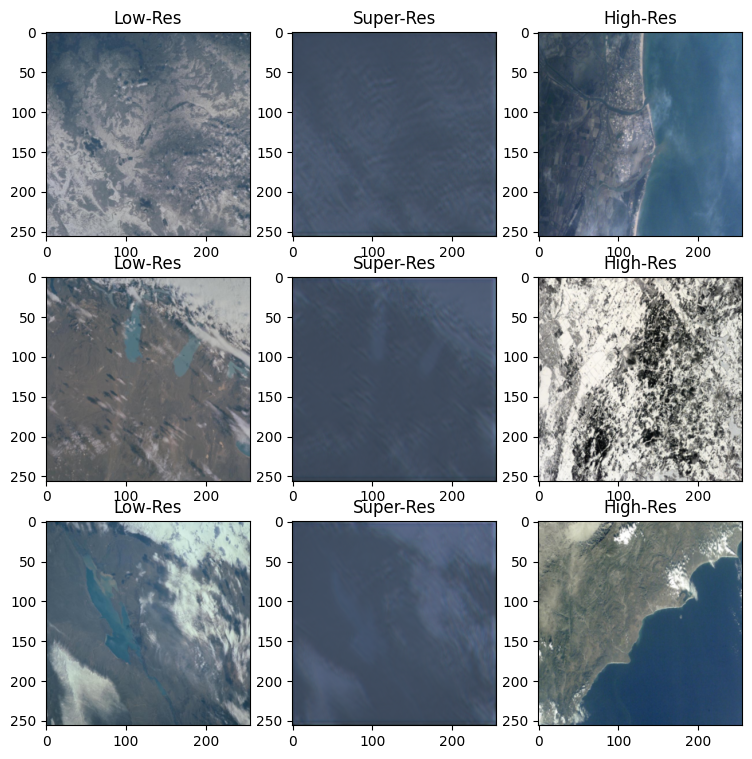

In [ ]:
import matplotlib.pyplot as plt

# Get a batch of test data
lr_imgs, hr_imgs = next(iter(dataloader))
lr_imgs, hr_imgs = lr_imgs.to(device), hr_imgs.to(device)

# Generate high-res images
with torch.no_grad():
    sr_imgs = model(lr_imgs)

# Plot the results
fig, axs = plt.subplots(3, 3, figsize=(9, 9))
for i in range(3):
    axs[i, 0].imshow(lr_imgs[i].cpu().permute(1, 2, 0).numpy())
    axs[i, 0].set_title("Low-Res")
    axs[i, 1].imshow(sr_imgs[i].cpu().permute(1, 2, 0).numpy())
    axs[i, 1].set_title("Super-Res")
    axs[i, 2].imshow(hr_imgs[i].cpu().permute(1, 2, 0).numpy())
    axs[i, 2].set_title("High-Res")
plt.show()


In [ ]:
import torchvision.models as models

class PerceptualLoss(nn.Module):
    def __init__(self):
        super(PerceptualLoss, self).__init__()
        vgg = models.vgg19(pretrained=True).features[:36]  # Use first 36 layers
        for param in vgg.parameters():
            param.requires_grad = False
        self.vgg = vgg
        self.criterion = nn.MSELoss()

    def forward(self, sr, hr):
        sr_features = self.vgg(sr)
        hr_features = self.vgg(hr)
        loss = self.criterion(sr_features, hr_features)
        return loss


In [ ]:
perceptual_loss = PerceptualLoss().to(device)

for epoch in range(epochs):
    for lr_imgs, hr_imgs in dataloader:
        lr_imgs, hr_imgs = lr_imgs.to(device), hr_imgs.to(device)

        optimizer.zero_grad()
        outputs = model(lr_imgs)
        loss = perceptual_loss(outputs, hr_imgs)
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:05<00:00, 107MB/s]


Epoch [1/10], Loss: 0.0771
Epoch [2/10], Loss: 0.0649
Epoch [3/10], Loss: 0.0526
Epoch [4/10], Loss: 0.0767
Epoch [5/10], Loss: 0.0595
Epoch [6/10], Loss: 0.0770
Epoch [7/10], Loss: 0.0545
Epoch [8/10], Loss: 0.0501
Epoch [9/10], Loss: 0.0674
Epoch [10/10], Loss: 0.0693


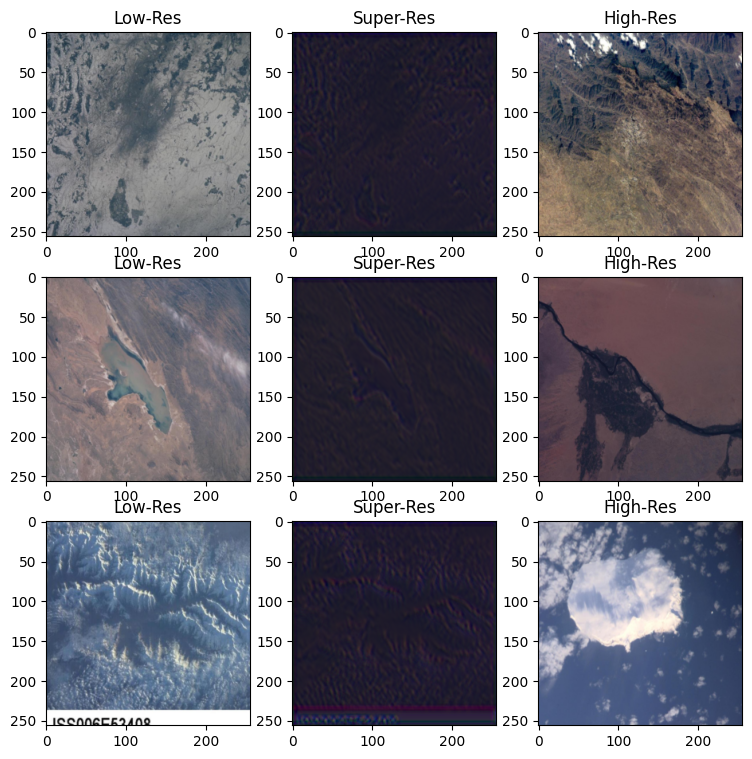

In [ ]:
import matplotlib.pyplot as plt

# Get a batch of test data
lr_imgs, hr_imgs = next(iter(dataloader))
lr_imgs, hr_imgs = lr_imgs.to(device), hr_imgs.to(device)

# Generate high-res images
with torch.no_grad():
    sr_imgs = model(lr_imgs)

# Plot the results
fig, axs = plt.subplots(3, 3, figsize=(9, 9))
for i in range(3):
    axs[i, 0].imshow(lr_imgs[i].cpu().permute(1, 2, 0).numpy())
    axs[i, 0].set_title("Low-Res")
    axs[i, 1].imshow(sr_imgs[i].cpu().permute(1, 2, 0).numpy())
    axs[i, 1].set_title("Super-Res")
    axs[i, 2].imshow(hr_imgs[i].cpu().permute(1, 2, 0).numpy())
    axs[i, 2].set_title("High-Res")
plt.show()


In [ ]:
class CombinedLoss(nn.Module):
    def __init__(self, perceptual_weight=0.8, pixel_weight=0.2):
        super(CombinedLoss, self).__init__()
        self.perceptual_loss = PerceptualLoss()
        self.pixel_loss = nn.MSELoss()
        self.perceptual_weight = perceptual_weight
        self.pixel_weight = pixel_weight

    def forward(self, sr, hr):
        perceptual = self.perceptual_loss(sr, hr)
        pixel = self.pixel_loss(sr, hr)
        return self.perceptual_weight * perceptual + self.pixel_weight * pixel


In [ ]:
criterion = CombinedLoss(perceptual_weight=0.8, pixel_weight=0.2).to(device)

for epoch in range(epochs):
    for lr_imgs, hr_imgs in dataloader:
        lr_imgs, hr_imgs = lr_imgs.to(device), hr_imgs.to(device)

        optimizer.zero_grad()
        outputs = model(lr_imgs)
        loss = criterion(outputs, hr_imgs)
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")


Epoch [1/10], Loss: 0.0564
Epoch [2/10], Loss: 0.0517
Epoch [3/10], Loss: 0.0687
Epoch [4/10], Loss: 0.0518
Epoch [5/10], Loss: 0.0750
Epoch [6/10], Loss: 0.0673
Epoch [7/10], Loss: 0.0527
Epoch [8/10], Loss: 0.0791
Epoch [9/10], Loss: 0.0449
Epoch [10/10], Loss: 0.0540


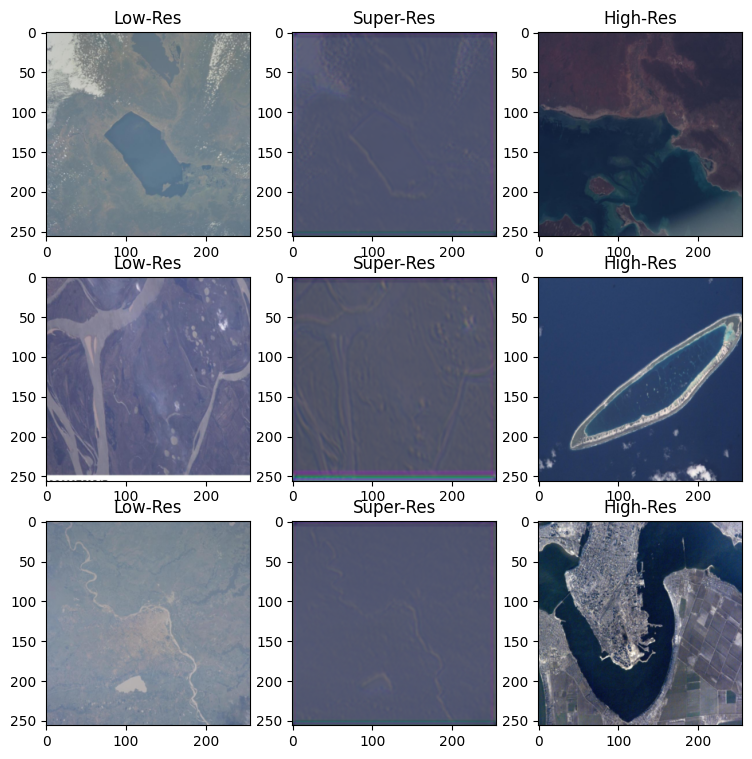

In [ ]:
import matplotlib.pyplot as plt

# Get a batch of test data
lr_imgs, hr_imgs = next(iter(dataloader))
lr_imgs, hr_imgs = lr_imgs.to(device), hr_imgs.to(device)

# Generate high-res images
with torch.no_grad():
    sr_imgs = model(lr_imgs)

# Plot the results
fig, axs = plt.subplots(3, 3, figsize=(9, 9))
for i in range(3):
    axs[i, 0].imshow(lr_imgs[i].cpu().permute(1, 2, 0).numpy())
    axs[i, 0].set_title("Low-Res")
    axs[i, 1].imshow(sr_imgs[i].cpu().permute(1, 2, 0).numpy())
    axs[i, 1].set_title("Super-Res")
    axs[i, 2].imshow(hr_imgs[i].cpu().permute(1, 2, 0).numpy())
    axs[i, 2].set_title("High-Res")
plt.show()


In [ ]:
import torch
torch.cuda.empty_cache()


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Residual block
class ResidualBlock(nn.Module):
    def __init__(self, channels):
        super(ResidualBlock, self).__init__()
        self.block = nn.Sequential(
            nn.Conv2d(channels, channels, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(channels, channels, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(channels),
        )

    def forward(self, x):
        return x + self.block(x)

# Generator architecture for SRGAN
class SRGANGenerator(nn.Module):
    def __init__(self):
        super(SRGANGenerator, self).__init__()
        self.initial = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=9, stride=1, padding=4),
            nn.PReLU()
        )
        self.residuals = nn.Sequential(*[ResidualBlock(64) for _ in range(16)])
        self.upscale = nn.Sequential(
            nn.Conv2d(64, 256, kernel_size=3, stride=1, padding=1),
            nn.PixelShuffle(2),
            nn.PReLU(),
            nn.Conv2d(64, 256, kernel_size=3, stride=1, padding=1),
            nn.PixelShuffle(2),
            nn.PReLU()
        )
        self.final = nn.Conv2d(64, 3, kernel_size=9, stride=1, padding=4)

    def forward(self, x):
        initial = self.initial(x)
        residual = self.residuals(initial)
        upscale = self.upscale(residual)
        return self.final(upscale)


In [ ]:
# Discriminator for SRGAN
class SRGANDiscriminator(nn.Module):
    def __init__(self):
        super(SRGANDiscriminator, self).__init__()
        self.net = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Flatten(),
            nn.Linear(128 * 16 * 16, 1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(1024, 1)
        )

    def forward(self, x):
        return self.net(x)


In [ ]:
# Adversarial loss for discriminator and generator
adversarial_loss = nn.BCEWithLogitsLoss()

# Perceptual loss using a pre-trained VGG model
class PerceptualLoss(nn.Module):
    def __init__(self):
        super(PerceptualLoss, self).__init__()
        vgg = models.vgg19(pretrained=True).features[:36]  # Use the first 36 layers
        for param in vgg.parameters():
            param.requires_grad = False
        self.vgg = vgg
        self.criterion = nn.MSELoss()

    def forward(self, sr, hr):
        sr_features = self.vgg(sr)
        hr_features = self.vgg(hr)
        return self.criterion(sr_features, hr_features)

# Combined loss (content + adversarial)
class CombinedLoss(nn.Module):
    def __init__(self, perceptual_weight=0.8, pixel_weight=0.2):
        super(CombinedLoss, self).__init__()
        self.perceptual_loss = PerceptualLoss()
        self.pixel_loss = nn.MSELoss()
        self.perceptual_weight = perceptual_weight
        self.pixel_weight = pixel_weight

    def forward(self, sr, hr):
        perceptual = self.perceptual_loss(sr, hr)
        pixel = self.pixel_loss(sr, hr)
        return self.perceptual_weight * perceptual + self.pixel_weight * pixel


In [ ]:
dataloader = DataLoader(dataset, batch_size=4, shuffle=True, num_workers=2)


In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
from torch.utils.checkpoint import checkpoint

def checkpointed_forward(model, input_tensor):
    return checkpoint(model, input_tensor)


In [ ]:
# Example: Reduce the number of filters in the first layers
class SmallerGenerator(nn.Module):
    def __init__(self):
        super(SmallerGenerator, self).__init__()
        self.initial = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=9, stride=1, padding=4),  # Fewer filters
            nn.PReLU()
        )
        self.residuals = nn.Sequential(*[ResidualBlock(32) for _ in range(8)])  # Fewer residual blocks
        self.upscale = nn.Sequential(
            nn.Conv2d(32, 128, kernel_size=3, stride=1, padding=1),
            nn.PixelShuffle(2),
            nn.PReLU(),
            nn.Conv2d(32, 128, kernel_size=3, stride=1, padding=1),
            nn.PixelShuffle(2),
            nn.PReLU()
        )
        self.final = nn.Conv2d(32, 3, kernel_size=9, stride=1, padding=4)

    def forward(self, x):
        initial = self.initial(x)
        residual = self.residuals(initial)
        upscale = self.upscale(residual)
        return self.final(upscale)


In [ ]:
device = torch.device("cpu")


In [ ]:
print(torch.cuda.memory_allocated())


13693746176


In [ ]:
dataloader = DataLoader(dataset, batch_size=2, shuffle=True, num_workers=2)


In [ ]:
# Free up unused memory
torch.cuda.empty_cache()


In [ ]:
device = torch.device("cpu")


In [ ]:
print(torch.cuda.memory_allocated())


13693746176


In [ ]:
!nvidia-smi


Mon Dec  2 06:38:01 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0              33W /  70W |  15075MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--